In [2]:
!pip install plyfile

In [198]:
from plyfile import PlyData, PlyElement
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
%matplotlib notebook
%matplotlib inline

# Read Data

In [102]:
plydata = PlyData.read('earthquakes.ply')

In [103]:
print(plydata)

ply
format ascii 1.0
element vertex 521721
property float x
property float y
property float z
property uchar red
property uchar green
property uchar blue
end_header


# Compose Data

In [143]:
x = plydata.elements[0].data['x']
y = plydata.elements[0].data['y']
z = plydata.elements[0].data['z']

x = x[:,np.newaxis]
y = y[:,np.newaxis]
z = z[:,np.newaxis]

data = np.concatenate((x,y,z), axis=-1)

print(data.shape)


(521721, 3)


In [164]:
index = np.random.choice(521721, 10000)
sampled_data = data[index]

In [165]:
sampled_data.shape

(10000, 3)

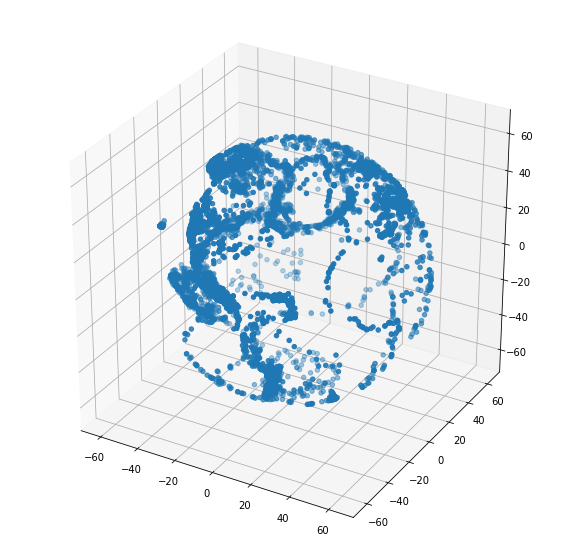

In [199]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sampled_data[:,0], sampled_data[:,1], sampled_data[:,2])
plt.show()


In [167]:
def evaluate(model, parameter_grid, data):
    best_score=-1
    for param in parameter_grid:
        model.set_params(**param)
        model.fit(data)
        if len(np.unique(model.labels_))>1: # ako brojot na klasterite mi e pogolem od 1
            curent_score = metrics.silhouette_score(data, model.labels_) # meram siluette_score na toj model so izbrani parametri
            print("Parameter : ", param, "Score :", curent_score)
            if curent_score>best_score: # ako skorot sto mi ja dava metrikata e pogolem od najdobriot skor
                best_score=curent_score
                best_grid=param
    print(best_grid)
    print(best_score)
    



### Tune DBSCAN Parametars

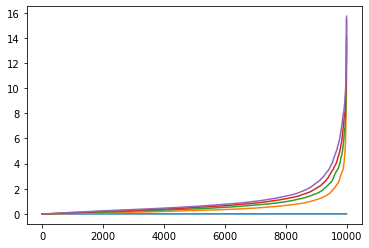

In [152]:
#find best eps parametar if we use this way
X_ex = sampled_data
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_ex)
distances, indices = nbrs.kneighbors(X_ex)
distances = np.sort(distances, axis=0)
plt.plot(distances)

In [168]:
from sklearn.cluster import DBSCAN
e = [0.1, 0.2, 0.3, 1.8, 2, 2.5, 2.7,3.8, 4, 10,15,20,25,30]
#e = np.arange(0.2,20,0.2)
m = np.arange(10,510,50)

model = DBSCAN()
parameters = {'eps' : [0.1, 0.2, 0.3, 1.8, 2, 2.5, 2.7,3.8, 4, 10,15,20,25,30], 
              'min_samples': [4, 5, 7, 8, 9, 10, 12, 15, 16, 18, 20, 25, 30,100,200,300,400,500]}
parameter_grid = ParameterGrid(parameters)
data = sampled_data

evaluate(model, parameter_grid, data)

Parameter :  {'eps': 0.1, 'min_samples': 4} Score : -0.599146
Parameter :  {'eps': 0.1, 'min_samples': 5} Score : -0.5733319
Parameter :  {'eps': 0.1, 'min_samples': 7} Score : -0.5491847
Parameter :  {'eps': 0.1, 'min_samples': 8} Score : -0.4776986
Parameter :  {'eps': 0.1, 'min_samples': 9} Score : -0.4246885
Parameter :  {'eps': 0.1, 'min_samples': 10} Score : -0.41678613
Parameter :  {'eps': 0.1, 'min_samples': 12} Score : -0.43033168
Parameter :  {'eps': 0.1, 'min_samples': 15} Score : -0.35034442
Parameter :  {'eps': 0.1, 'min_samples': 16} Score : -0.3479627
Parameter :  {'eps': 0.1, 'min_samples': 18} Score : -0.23132132
Parameter :  {'eps': 0.1, 'min_samples': 20} Score : -0.23152494
Parameter :  {'eps': 0.1, 'min_samples': 25} Score : -0.21349986
Parameter :  {'eps': 0.1, 'min_samples': 30} Score : -0.21349986
Parameter :  {'eps': 0.1, 'min_samples': 100} Score : -0.07089188
Parameter :  {'eps': 0.1, 'min_samples': 200} Score : -0.07089188
Parameter :  {'eps': 0.2, 'min_samp

Parameter :  {'eps': 4, 'min_samples': 4} Score : -0.23760241
Parameter :  {'eps': 4, 'min_samples': 5} Score : -0.18516399
Parameter :  {'eps': 4, 'min_samples': 7} Score : -0.13772024
Parameter :  {'eps': 4, 'min_samples': 8} Score : -0.03480913
Parameter :  {'eps': 4, 'min_samples': 9} Score : -0.039996337
Parameter :  {'eps': 4, 'min_samples': 10} Score : 0.0019336685
Parameter :  {'eps': 4, 'min_samples': 12} Score : 0.06138004
Parameter :  {'eps': 4, 'min_samples': 15} Score : 0.1180467
Parameter :  {'eps': 4, 'min_samples': 16} Score : 0.1362812
Parameter :  {'eps': 4, 'min_samples': 18} Score : 0.18548973
Parameter :  {'eps': 4, 'min_samples': 20} Score : 0.1859454
Parameter :  {'eps': 4, 'min_samples': 25} Score : 0.37507
Parameter :  {'eps': 4, 'min_samples': 30} Score : 0.3575736
Parameter :  {'eps': 4, 'min_samples': 100} Score : 0.23260055
Parameter :  {'eps': 4, 'min_samples': 200} Score : 0.072131634
Parameter :  {'eps': 4, 'min_samples': 300} Score : 0.07538589
Paramete

In [169]:
#Perform DBScan with best parametars

labelss = DBSCAN(eps=10, min_samples=200).fit(data)
dbscan_all_labels = labelss.labels_
dbscan_all_labels

array([0, 1, 2, ..., 1, 1, 2], dtype=int64)

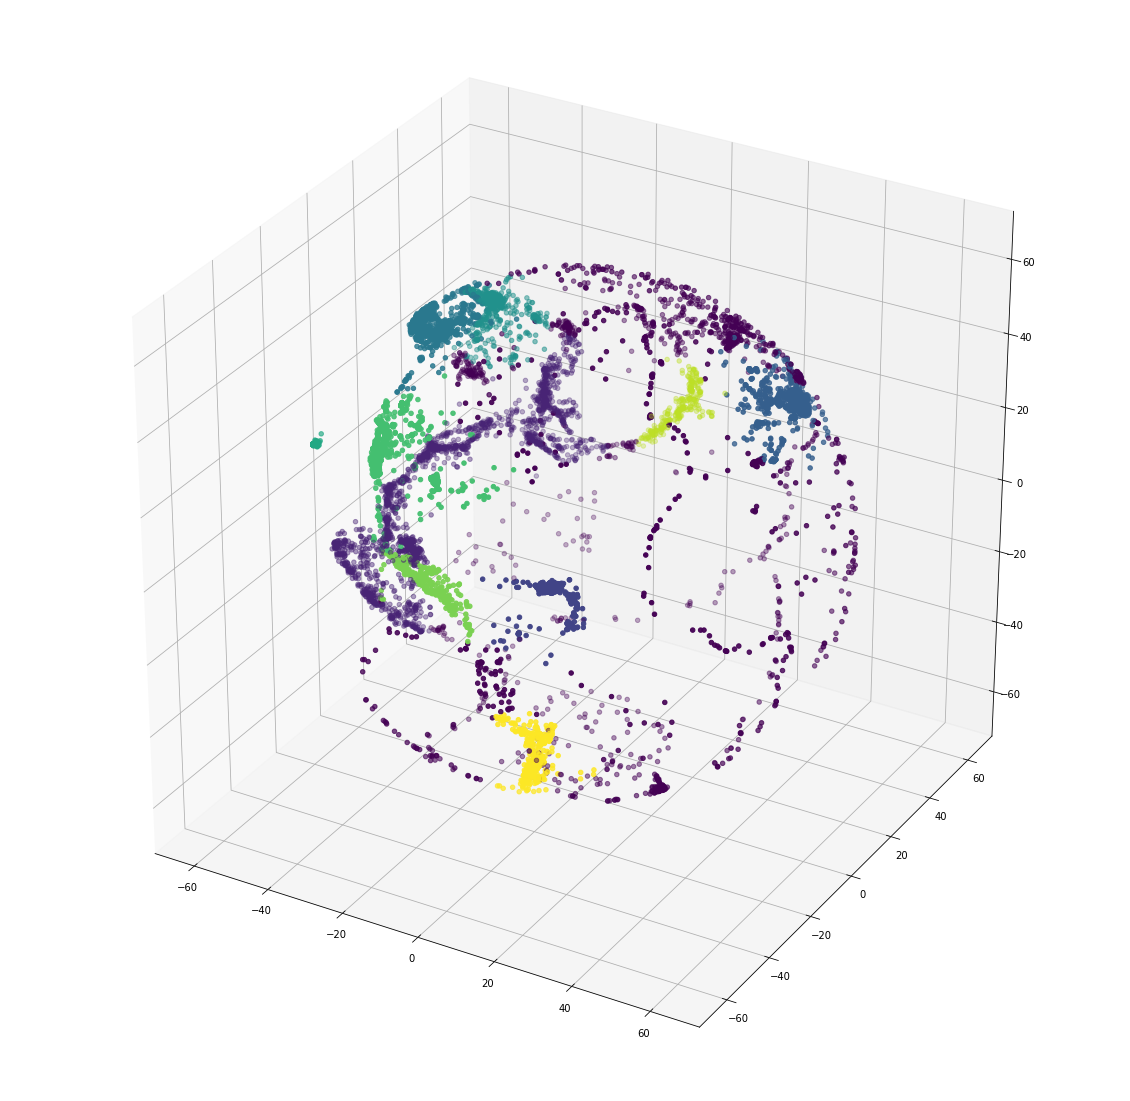

In [202]:
#plot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sampled_data[:,0], sampled_data[:,1], sampled_data[:,2], c=dbscan_all_labels)
plt.show()

Добро се одделуваат граничните линии и тоа е добро во користење на овој алгоритам при претставување на ваков тип на проблем.

In [120]:
print(np.unique(dbscan_all_labels))

[-1  0  1  2  3  4]


### Tune Aglomerative Clustering

In [187]:
model = AgglomerativeClustering(linkage='average')
parameters = {'n_clusters':[2,3,4,5,7,8,9,10,12,14,15,16,18,19,20,21]}
parameter_grid = ParameterGrid(parameters)
data = sampled_data

evaluate(model, parameter_grid, data)

Parameter :  {'n_clusters': 2} Score : 0.23263384
Parameter :  {'n_clusters': 3} Score : 0.228298
Parameter :  {'n_clusters': 4} Score : 0.3763188
Parameter :  {'n_clusters': 5} Score : 0.4506113
Parameter :  {'n_clusters': 7} Score : 0.419834
Parameter :  {'n_clusters': 8} Score : 0.43683252
Parameter :  {'n_clusters': 9} Score : 0.44916221
Parameter :  {'n_clusters': 10} Score : 0.46942237
Parameter :  {'n_clusters': 12} Score : 0.47644088
Parameter :  {'n_clusters': 14} Score : 0.47875366
Parameter :  {'n_clusters': 15} Score : 0.47926387
Parameter :  {'n_clusters': 16} Score : 0.48009992
Parameter :  {'n_clusters': 18} Score : 0.5516835
Parameter :  {'n_clusters': 19} Score : 0.55106765
Parameter :  {'n_clusters': 20} Score : 0.55171585
Parameter :  {'n_clusters': 21} Score : 0.5475976
{'n_clusters': 20}
0.55171585


In [188]:
#Perform Agglomerative Clustering
agglo_model = AgglomerativeClustering(n_clusters=20)
agglo_model_fit = agglo_model.fit(data)
labels_agglo = agglo_model_fit.labels_

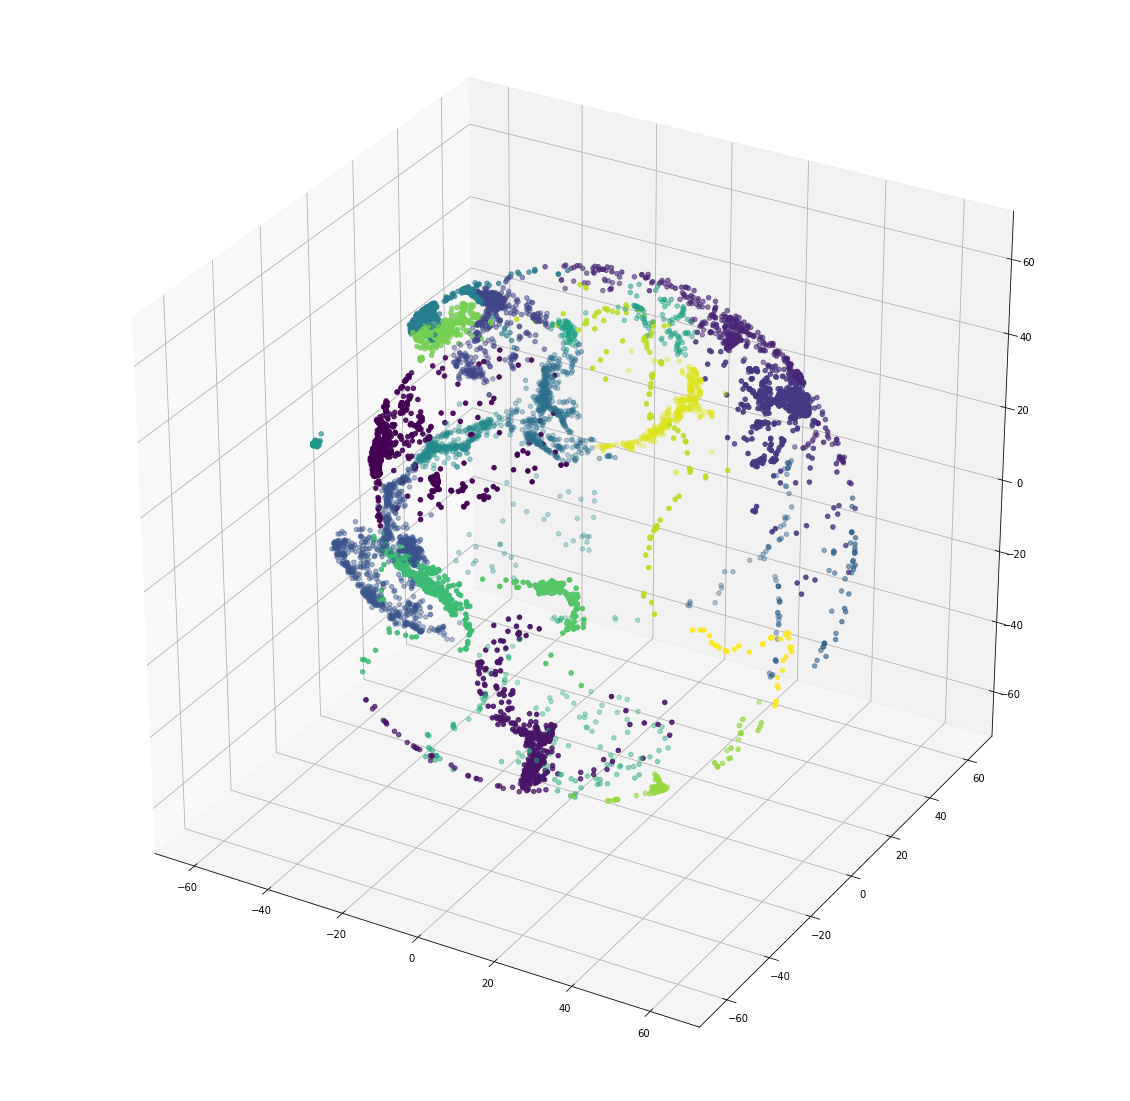

In [201]:
#plot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sampled_data[:,0], sampled_data[:,1], sampled_data[:,2], c=labels_agglo)
plt.show()

На прв поглед не изгледа лошо,но има точки кои се гледа дека отстапуваат односно имаат грешен клаастер, и некаде се забележува мешање на кластерите,што исто така не е добро. Најдобри рез со linkage = 'average'.

### Tune KMeans

In [175]:
model = KMeans()
parameters = {'n_clusters' : [2,3,4,5,10,20,30]}
parameter_grid = ParameterGrid(parameters)
data = sampled_data
evaluate(model, parameter_grid, data)

Parameter :  {'n_clusters': 2} Score : 0.3525185
Parameter :  {'n_clusters': 3} Score : 0.3962251
Parameter :  {'n_clusters': 4} Score : 0.47944
Parameter :  {'n_clusters': 5} Score : 0.48888856
Parameter :  {'n_clusters': 10} Score : 0.5540197
Parameter :  {'n_clusters': 20} Score : 0.5635074
Parameter :  {'n_clusters': 30} Score : 0.57092285
{'n_clusters': 30}
0.57092285


In [176]:
#Perform KMeans
kmeans_model = KMeans(n_clusters = 30)
fitted_model = kmeans_model.fit(data)
labels_kmeans = fitted_model.labels_

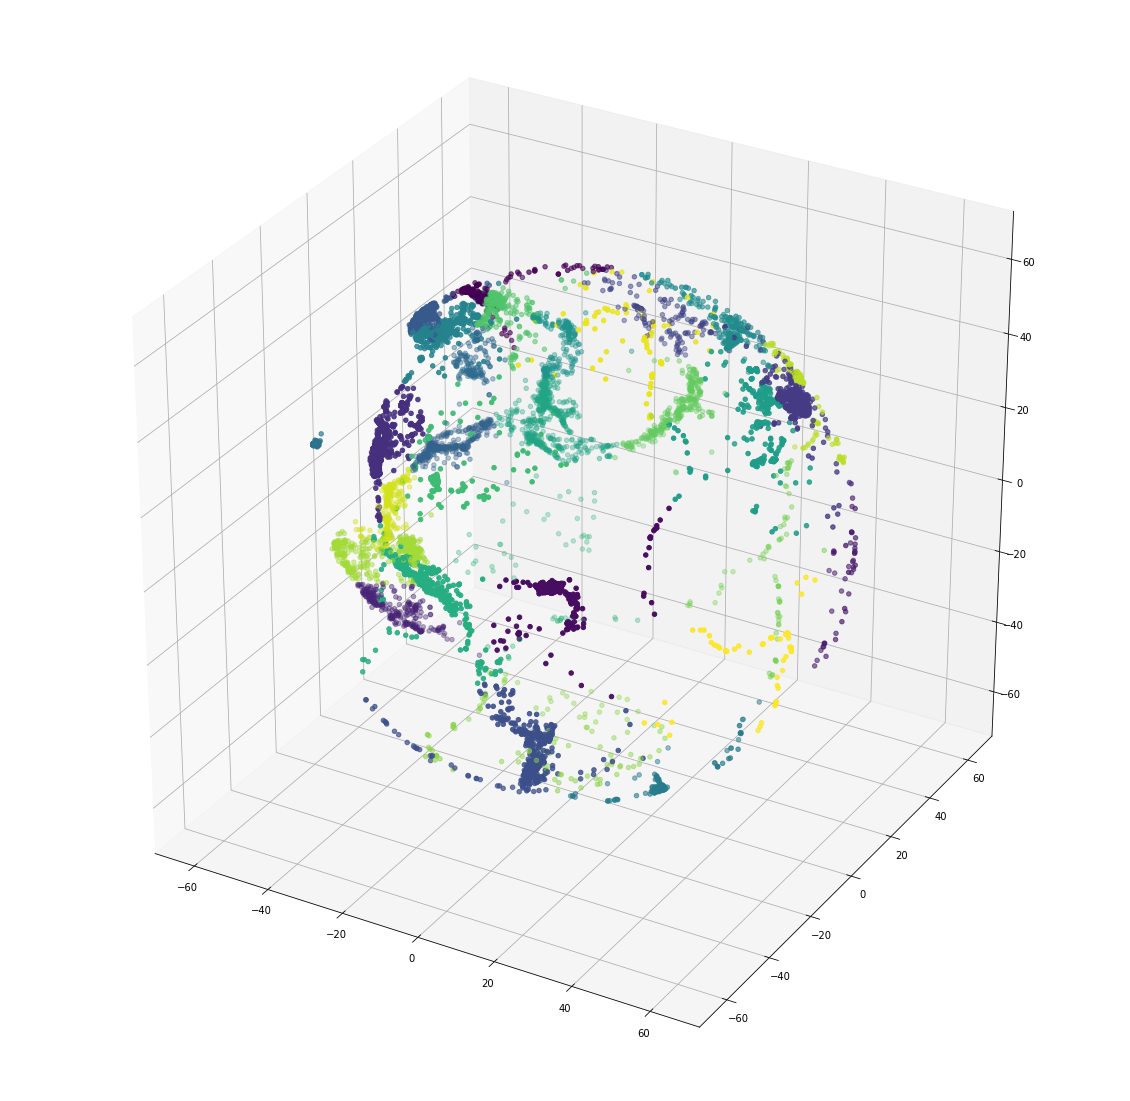

In [200]:
#plot
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sampled_data[:,0], sampled_data[:,1], sampled_data[:,2], c=labels_kmeans)
plt.show()

Дел од податоците се мешат со други кластери и тоа не е добро во претставата на овој алгоритам и се форимираат голем број на кластери.Не може добро да се утврдат граничните линии.